In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
# Courses
c1courses = pd.read_excel("../content/C1 Courses.xlsx")
c2courses = pd.read_excel("../content/C2 Courses.xlsx")
c4courses = pd.read_excel("../content/C4Courses.xlsx")

# 
c1questions = pd.read_excel("../content/C1 Questions.xlsx")
c2questions = pd.read_excel("../content/C2 Questions.xlsx")
c4questions = pd.read_excel("../content/C4Questions.xlsx")
c4usercourses = pd.read_excel("../content/C4UsersCourses.xlsx")

In [ ]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1questions columns:", c1questions.columns.to_list())

c1courses columns: ['CourseID', 'StartDate', 'Deadline_Cmmnt', 'Deadline_Qustn']
c1questions columns: ['id', 'course_id', 'timestamp', 'user', 'avg_rating', 'total_responses', 'total_ratings', 'top_rating_count', 'avg_difficulty', 'total_comments', 'deleted', 'answer', 'numAlts', 'question', 'altA', 'altB', 'altC', 'altD', 'altE', 'explanation']


Cycle 1

In [ ]:
c1courses.rename(columns = {"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace = True)
c1questions.rename(columns = {"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}, inplace = True)

In [ ]:
c1questions = c1questions.astype({"course_id" : "int64", "question_time" : 'datetime64'})
c1courses = c1courses.convert_dtypes()

c1combined = c1courses.merge(c1questions, on = "course_id")
c1combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,numAlts,question,altA,altB,altC,altD,altE,explanation
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342368,2020-03-04 17:52:14,217514,0.00,0,0,0,0.0000,0,2,A,4,<p>[2a] In early 1950s high quality X-ray dif...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342370,2020-03-04 17:52:14,217514,0.50,7,4,0,0.2500,5,0,A,4,<p>[Table X - Topic 2a] In early 1950s high q...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349814,2020-03-09 15:55:46,636010,2.33,10,9,0,0.2222,6,0,B,4,<p>Which of the following statements is true ...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 5...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 3...,...,<p>DNA polymerase is only able to synthesize ...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349841,2020-03-09 16:16:45,636012,2.25,5,4,0,1.0000,3,0,B,5,<p>The structure of DNA is closely related to...,<p>All base pairs interact by forming three h...,<p>DNA is comprised of nucleotide subunits ea...,<p>The double helix of DNA is stabilized by i...,<p>Each DNA sequence folds into a unique and ...,<p>DNA base pairs are held together by strong...,<p>DNA is made up of nucleotide subunits boun...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349844,2020-03-09 16:17:41,636018,2.67,5,3,0,0.3333,4,0,C,4,"<p>In a DNA molecule, Chargaff's rule means t...",<p>The amount of Adenine and Thymine = The am...,<p>The amount of Cytosine and Guanine = The a...,<p>The amount of Adenine and Guanine = The am...,<p>All of the above</p> ...,...,<p>Chargaff's rule states that the number of ...


In [ ]:
c1combined["question_delta"] = (c1combined["question_time"] - c1combined["question_due"])
c1combined["question_beforedue"] = (c1combined["question_due"] - c1combined["question_time"])
c1combined["late"] = c1combined["question_time"] > c1combined["question_due"]


Cycle 2

In [ ]:
c2courses.rename(columns = {"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}, inplace = True)
c2courses.drop("CourseName", axis = 1, inplace = True)
c2questions.rename(columns = {"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}, inplace = True)

In [ ]:
c2questions = c2questions.astype({"course_id" : "int64", "question_time" : 'datetime64'})
c2courses = c2courses.convert_dtypes()

c2combined = c2courses.merge(c2questions, on = "course_id")
c2combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4391826,2020-03-26 19:10:48,636022,3.5,5,2,0,0.5,3,0,B,<p>Which of the following pair includes a pha...,4,"<p>G1 phase, DNA replication</p> ...","<p>G2 phase, preparation for mitosis</p> ...","<p>S phase, cell division</p> ...","<p>M phase, cell growth</p> ...",...,<p>G1 phase is growth and preparation of the ...
1,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392006,2020-03-26 20:54:26,636011,3.5,8,6,1,1.0,6,2,D,<p>A telomere has a repetitive nucleotide seq...,5,"<p>4, 3, 1, 2, 5</p> ...","<p>1, 2, 3, 4, 5</p> ...","<p>2, 5, 4, 1, 3</p> ...","<p>4, 2, 1, 3, 5</p> ...","<p>2, 4, 1, 5, 3</p> ...",<p>The correct answer is D with steps numbere...
2,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392084,2020-03-26 21:46:58,635990,3.5,3,2,0,1.0,2,0,D,<p>Table 8:</p><p>Which of the following stat...,4,<p>G0 is an optional part of the cell cycle w...,<p>All Eukaryotic cells which divide via the ...,"<p>In G0 phase, a cell replicates its DNA to ...",<p>Some types of cells can enter G0 phase and...,...,<p>The answer is D: G0 phase occurs when cell...
3,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392568,2020-03-27 01:07:25,636008,0.0,0,0,0,0.0,0,2,B,<p>There are some cells with different settin...,5,<p>a</p> ...,<p>b</p> ...,<p>c</p> ...,<p>d</p> ...,<p>e</p> ...,<p>All normal cells including heart cells and...
4,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392616,2020-03-27 01:25:01,636014,3.0,1,1,0,1.0,1,2,B,<p>Mary is a healthy 17 years old teenager wh...,5,<p>Too much telomerase activity can cause chr...,<p>The supplement can result in permanent act...,<p>The supplement can result in permanent act...,<p>The activation of telomerase does not allo...,<p>The activation of telomerase lowers the ra...,<p>The progressive shortening of telomeres as...


In [ ]:
c2combined["question_delta"] = (c2combined["question_time"] - c2combined["question_due"])
c2combined["question_beforedue"] = (c2combined["question_due"] - c2combined["question_time"])
c2combined["late"] = c2combined["question_time"] > c2combined["question_due"]


Combining

In [ ]:
c1combined["cycle"] = 1
c2combined["cycle"] = 2

all_combined = pd.concat([c1combined, c2combined])
all_combined = all_combined.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
all_combined[all_combined['late']].sort_values(by = 'question_beforedue', ascending = False)

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,numAlts,question,altA,altB,altC,altD,altE,explanation,question_delta,question_beforedue,late,cycle
303,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,4354365,2020-03-12 01:01:16,636871,2.50,15,14,1,0.1429,13,0,C,4,<p>Which of the following enzymes is the prin...,<p>DNA polymerase I</p> ...,<p>DNA polymerase II</p> ...,<p>DNA polymerase III</p> ...,<p>None of these</p> ...,...,<p>Source:&nbsp;</p><p>Sanfoundry. 2020. DNA ...,0 days 00:01:06,-1 days +23:58:54,True,1
304,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,4354379,2020-03-12 01:05:06,636745,1.88,20,16,2,0.2500,16,0,C,4,<p>Which is the most processive of prokaryoti...,<p>pol I</p> ...,<p>pol II</p> ...,<p>pol III</p> ...,<p>klenow fragment</p> ...,...,<p>DNA pol III holoenzyme has a processivity ...,0 days 00:04:56,-1 days +23:55:04,True,1
186,21037,2020-03-10,2020-03-18 01:00:10,2020-03-11 01:00:10,4352594,2020-03-11 01:05:06,636388,3.33,14,9,0,0.8889,11,0,A,4,<p>Which of the following forces can stabilis...,<p>Base-stacking is a non-covalent interactio...,<p>Base-pairing is a non-covalent interaction...,<p>The hydrophilic sugar-phosphate groups are...,<p>The deoxyribose rings form N-glycosidic bo...,...,<p>Hydrophobic interactions result in base st...,0 days 00:04:56,-1 days +23:55:04,True,1
477,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,4407211,2020-04-02 01:06:11,637312,1.00,4,4,0,0.0000,4,0,B,5,<p>What is the preferred and optimal solution...,"<p>5ml acidic deionised water (0.9% w/v), swi...",<p>10ml sterile solution of isotonic saline (...,"<p>5ml alkaline deionised water (0.9% w/v), s...","<p>10ml pure deionised water,&nbsp;swilled ar...",<p>15ml sterile solution of isotonic saline (...,<p>to answer correctly student must know:</p>...,0 days 00:06:01,-1 days +23:53:59,True,2
344,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,4404775,2020-04-01 01:06:24,636863,1.33,3,3,0,0.3333,3,0,B,4,"<p>What statement regarding histones, chromat...",<p>Histones are made up of two molecules of H...,<p>Nucleosome is composed of histone octamer ...,<p>Each nucleosome has an H2 associated and a...,<p>The major force holding the association of...,...,<p>A.&nbsp;Histones are made up of two molecu...,0 days 00:06:14,-1 days +23:53:46,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,4423854,2020-04-08 18:27:53,504817,0.00,0,0,0,0.0000,0,0,C,4,"<p>In human genome, 30,000 protein coding gen...",<p>Regulatory sequences</p> ...,<p>Non coding RNA</p> ...,<p>Introns</p> ...,<p>Pseudogenes</p> ...,...,<p>Introns take up ~25% of genome</p> ...,7 days 17:27:43,-8 days +06:32:17,True,2
273,21141,2020-03-24,2020-04-06 01:00:10,2020-03-31 01:00:10,4421103,2020-04-07 19:11:30,636434,2.00,1,1,0,0.0000,1,0,A,4,<p>Polymerase Chain Reaction is commonly used...,<p>Uses very low amounts of DNA</p> ...,<p>Finds information about target sequence&nb...,<p>Contamination is unlikely to occur</p> ...,<p>All of the above</p> ...,...,<p>The advantage of PCR is that it uses very ...,7 days 18:11:20,-8 days +05:48:40,True,2
537,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,4427475,2020-04-10 12:14:21,637281,0.00,0,0,0,0.0000,0,2,A,4,"<p>A PCR experiment is being carried out, the...",<p>A) No reaction would occur</p> ...,<p>B) A reaction would occur but only fewer c...,<p>C) A reaction would occur but more copies ...,<p>D) A reaction occurs as you expected and f...,...,<p>No reaction would occur as nucleotides are...,8 days 11:14:11,-9 days +12:45:49,True,2
538,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,4427479,2020-04-10 12:14:21,637281,0.00,0,0,0,0.0000,0,0,A,4,"<p>A PCR experiment is being carried out, the...",<p>A) No reaction would 

Data Investigation

In [ ]:
print("Earliest question was made at:", all_combined["question_time"].min().strftime("%d/%m/%Y"))
print("Latest question was made at:", all_combined["question_time"].max().strftime("%d/%m/%Y"))

Earliest question was made at: 04/03/2020
Latest question was made at: 10/04/2020


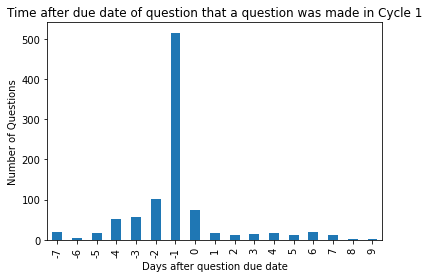

In [ ]:
delta_grouped = all_combined["question_time"].groupby(all_combined["question_delta"].dt.days).count()
delta_grouped.plot(kind = "bar", xlabel = "Days after question due date", ylabel = "Number of Questions", title = "Time after due date of question that a question was made in Cycle 1")

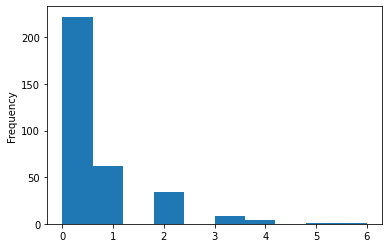

In [ ]:
student_lateness = all_combined[["user_id", "late"]].groupby("user_id", as_index = False).sum("late")
student_lateness["late"].plot(kind = "hist")

In [ ]:
student_lateness.sort_values("late", ascending = False)

,user_id,late
319,637569,6
118,636396,5
179,636734,4
66,636029,4
310,637310,4
...,...,...
146,636424,0
151,636429,0
152,636430,0
153,636431,0


Connecting to cycle 4 groups

In [ ]:
c4usercourses.rename(columns = {"user" : "user_id", "Team" : "team"}, inplace = True)
c4usercourses_lateness = c4usercourses.merge(student_lateness.reset_index(drop = True), on = "user_id")

In [ ]:
c4usercourses_lateness.sort_values(by = "late", ascending = False)

,user_id,course_id,team,late
138,637569,21326,Blue,6
129,636396,21326,Pink,5
170,636734,21327,Brown,4
40,636029,21320,Pink,4
266,637310,21328,Pink,4
...,...,...,...,...
131,604835,21326,Green,0
132,636439,21326,Purple,0
134,636429,21326,Yellow,0
137,636416,21326,Blue,0


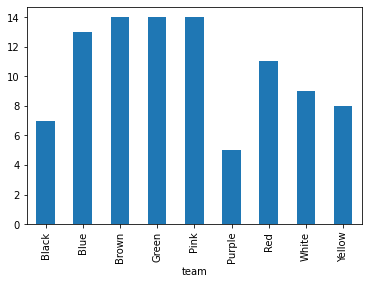

In [ ]:
student_late_boolean = all_combined[["user_id", "late"]].groupby("user_id", as_index = False).any("late")
team_lateness_boolean = c4usercourses.merge(student_late_boolean, on = "user_id")
team_lateness_boolean.groupby("team")["late"].sum().plot.bar()

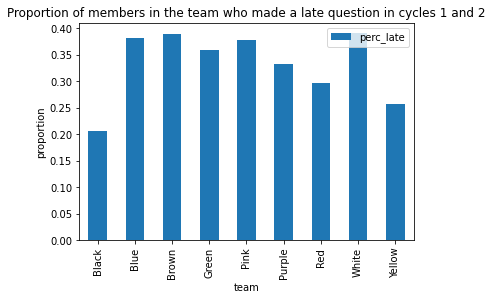

In [ ]:
c4usercourses[c4usercourses['team'] == 'Pink']
team_lateness_boolean[team_lateness_boolean['team'] == 'Pink']

members_late = team_lateness_boolean[["team", "late"]].groupby("team").sum()
team_size = team_lateness_boolean[["team", "user_id"]].groupby("team").nunique()

members_late["num_members"] = team_size
members_late["perc_late"] = members_late["late"] / members_late["num_members"]
members_late = members_late.reset_index()
members_late[["team", "perc_late"]].plot.bar(x = "team", title = "Proportion of members in the team who made a late question in cycles 1 and 2", ylabel = "proportion")